In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import pandas as pd
import numpy as np

# from Chapter4.TemporalAbstraction import NumericalAbstraction
from Chapter4.FrequencyAbstraction import FourierTransformation

plt.rcParams['figure.dpi'] = 200

In [36]:
def plot_frequencies(data_table, columns, match='like', display='line',size='',title=''):
    point_displays = ['+', 'x']
    line_displays = ['-']

    names = list(data_table.columns)

    f, xar = plt.subplots(len(columns), sharex=True, sharey=False,clear=True)
    f.set_figwidth(10)
    
    if title != '':
        f.suptitle(title)

    # x-axis as time
    # xfmt = md.DateFormatter('%H:%M') 

    xar[0].set_prop_cycle(color=[plt.get_cmap('Pastel1')(0)])
    xar[1].set_prop_cycle(color=[plt.get_cmap('Pastel1')(1)])
    xar[2].set_prop_cycle(color=[plt.get_cmap('Pastel1')(2)])
    xar[3].set_prop_cycle(color=[plt.get_cmap('Set1')(1),plt.get_cmap('Set1')(2),plt.get_cmap('Set1')(3),plt.get_cmap('Set1')(4),plt.get_cmap('Set1')(6)])

    # Pass through the columns specified.
    for i in range(0, len(columns)):
        # xar[i].xaxis.set_major_formatter(xfmt)
        
        if match[i] == 'exact':
            relevant_cols = [columns[i]]
        elif match[i] == 'like':
            relevant_cols = [name for name in names if columns[i] == name[0:len(columns[i])]]
        else:
            raise ValueError("Match should be 'exact' or 'like' for " + str(i) + ".")

        max_values = []
        min_values = []

        # Pass through the relevant columns.
        for j in range(0, len(relevant_cols)):
            # Create a mask to ignore the NaN and Inf values when plotting:
            mask = data_table[relevant_cols[j]].replace([np.inf, -np.inf], np.nan).notnull()
            max_values.append(data_table[relevant_cols[j]][mask].max())
            min_values.append(data_table[relevant_cols[j]][mask].min())

            # Display point, or as a line
            if display[i] == 'points':
                xar[i].plot(data_table.index[mask], data_table[relevant_cols[j]][mask],
                            point_displays[j%len(point_displays)])
            else:
                xar[i].plot(data_table.index[mask], data_table[relevant_cols[j]][mask],
                            line_displays[j%len(line_displays)],linewidth="0.2")

        xar[i].tick_params(axis='y', labelsize=7)

        xar[i].yaxis.set_major_locator(plticker.MultipleLocator(base=0.5))
        xar[3].yaxis.set_major_locator( plticker.MultipleLocator(base=1.0))        
        
        xar[i].legend(relevant_cols, fontsize='xx-small', numpoints=1, loc='upper center',
                        bbox_to_anchor=(0.5, 1.4), ncol=len(relevant_cols), fancybox=False, shadow=False)

        xar[i].set_ylim([min(min_values) - 0.1*(max(max_values) - min(min_values)),
                            max(max_values) + 0.1*(max(max_values) - min(min_values))])

    
    xar[3].set_ylim([0.5,1.5])

    xar[0].set_ylabel('highest amplitud frequency')
    xar[0].yaxis.set_label_coords(-.05, -1)
    
    # Make sure we get a nice figure with only a single x-axis and labels there.
    plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
    plt.xlabel('timestamp (ms)')

    xar[0].xaxis.set_label_coords(.9, -.1)

    # set the spacing between subplots
    plt.subplots_adjust(hspace=0.6)
    #turn interative mode off
    # plt.ioff()
    
    plt.linewidth=15

    f.patch.set_facecolor('xkcd:white')

    # return f
    return plt.figure()


In [43]:
dataset = pd.read_csv("./A3_dataset/COMBINED_ch3_result.csv")

# dataset.index = pd.to_datetime(dataset['YYYY-MO-DD HH-MI-SS_SSS'],format='%Y-%m-%d %H:%M:%S:%f')

for label in list(dataset.filter(regex='label-')):    
    dataset[label] = np.where(dataset[label] == True, 1, 0)

# milliseconds_per_instance = (dataset['Timestamps (ms)'][1] - dataset['Timestamps (ms)'][0])
milliseconds_per_instance = 500 # approx 500ms between instances

fs = float(1000)/milliseconds_per_instance        ##  fs = sampling rate (wut???)
ws = int(float(10000)/milliseconds_per_instance)  ##  ws = window size

# NumAbs = NumericalAbstraction()
FreqAbs = FourierTransformation()

print("fs= ",fs)
print("ws= ",ws)

fs=  2.0
ws=  20


In [44]:
fs = float(4)
ws = 40

In [45]:
dataset.head()

,Unnamed: 0,acc_x,acc_y,acc_z,grav_x,grav_y,grav_z,lin_x,lin_y,lin_z,...,timestamp_ms,label-jogging,label-cycling,label-football,label-jumprope,label-pushups,label-sitting,label-swimming,label-tennis,label-walking
0,0,5.00870,3.5865,6.0478,3.00250,4.03080,8.42070,2.0062,-0.4442,-2.3730,...,1620992871130,1,0,0,0,0,0,0,0,0
1,1,9.29790,-9.0417,3.4058,6.11765,3.60885,3.77155,1.2018,2.6037,9.4019,...,1620992871631,1,0,0,0,0,0,0,0,0
2,2,13.58710,-21.6699,0.7638,9.23280,3.18690,-0.87760,22.8759,-0.5101,20.9578,...,1620992872132,1,0,0,0,0,0,0,0,0
3,3,5.62875,0.4956,10.9619,8.47780,-1.96420,-4.52110,4.7023,23.7443,25.2070,...,1620992872631,1,0,0,0,0,0,0,0,0
4,4,-2.32960,22.6611,21.1600,8.37730,-2.77790,-4.27480,1.3718,25.8676,28.1546,...,1620992873131,1,0,0,0,0,0,0,0,0


In [46]:
dataset = FreqAbs.abstract_frequency(dataset, ['acc_x'], ws, fs)
dataset = FreqAbs.abstract_frequency(dataset, ['acc_y'], ws, fs)
dataset = FreqAbs.abstract_frequency(dataset, ['acc_z'], ws, fs)

dataset = FreqAbs.abstract_frequency(dataset, ['grav_x'], ws, fs)
dataset = FreqAbs.abstract_frequency(dataset, ['grav_y'], ws, fs)
dataset = FreqAbs.abstract_frequency(dataset, ['grav_z'], ws, fs)

dataset = FreqAbs.abstract_frequency(dataset, ['lin_x'], ws, fs)
dataset = FreqAbs.abstract_frequency(dataset, ['lin_y'], ws, fs)
dataset = FreqAbs.abstract_frequency(dataset, ['lin_z'], ws, fs)

dataset = FreqAbs.abstract_frequency(dataset, ['gyr_x'], ws, fs)
dataset = FreqAbs.abstract_frequency(dataset, ['gyr_y'], ws, fs)
dataset = FreqAbs.abstract_frequency(dataset, ['gyr_z'], ws, fs)

In [47]:
dataset = dataset[dataset.columns.drop(list(dataset.filter(regex='Hz_ws')))]

In [48]:
dataset.columns

Index(['Unnamed: 0', 'acc_x', 'acc_y', 'acc_z', 'grav_x', 'grav_y', 'grav_z',
       'lin_x', 'lin_y', 'lin_z', 'gyr_x', 'gyr_y', 'gyr_z',
       'time_since_start', 'timestamp_date', 'timestamp_ms', 'label-jogging',
       'label-cycling', 'label-football', 'label-jumprope', 'label-pushups',
       'label-sitting', 'label-swimming', 'label-tennis', 'label-walking',
       'acc_x_max_freq', 'acc_x_freq_weighted', 'acc_x_pse', 'acc_y_max_freq',
       'acc_y_freq_weighted', 'acc_y_pse', 'acc_z_max_freq',
       'acc_z_freq_weighted', 'acc_z_pse', 'grav_x_max_freq',
       'grav_x_freq_weighted', 'grav_x_pse', 'grav_y_max_freq',
       'grav_y_freq_weighted', 'grav_y_pse', 'grav_z_max_freq',
       'grav_z_freq_weighted', 'grav_z_pse', 'lin_x_max_freq',
       'lin_x_freq_weighted', 'lin_x_pse', 'lin_y_max_freq',
       'lin_y_freq_weighted', 'lin_y_pse', 'lin_z_max_freq',
       'lin_z_freq_weighted', 'lin_z_pse', 'gyr_x_max_freq',
       'gyr_x_freq_weighted', 'gyr_x_pse', 'gyr_y_max_f

<Figure size 900x600 with 0 Axes>

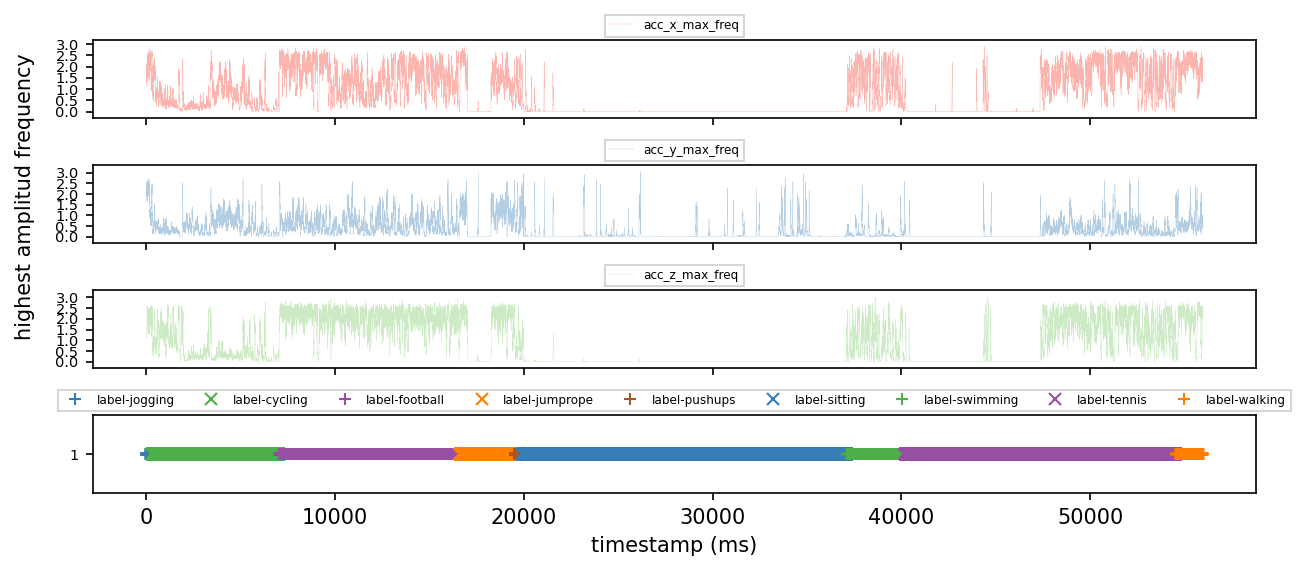

<Figure size 900x600 with 0 Axes>

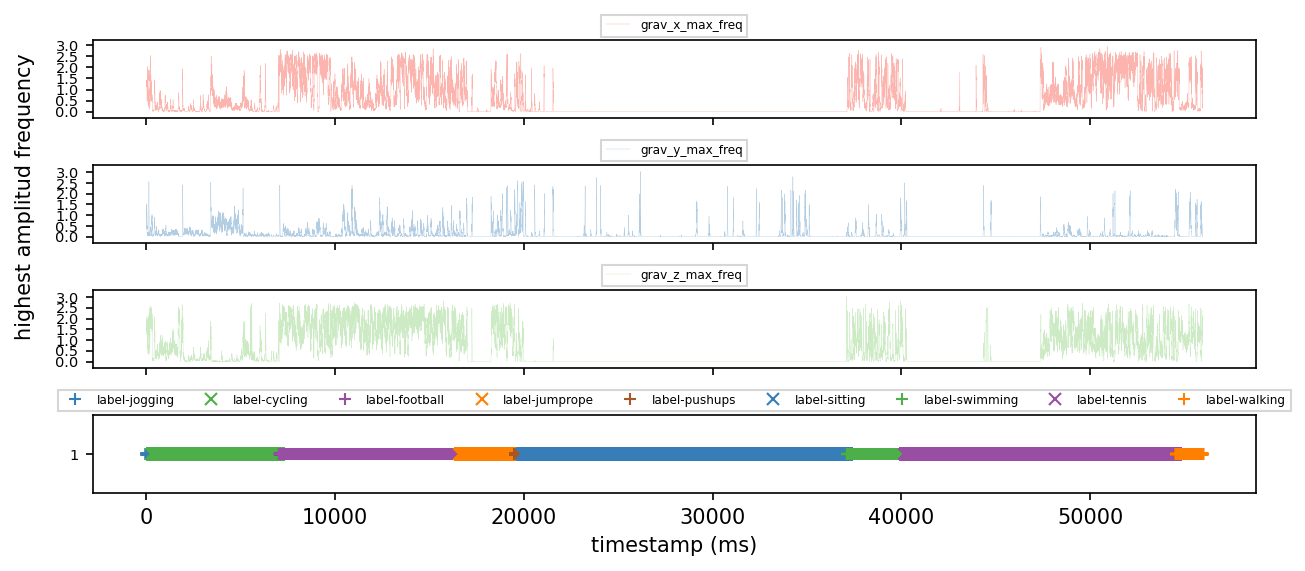

<Figure size 900x600 with 0 Axes>

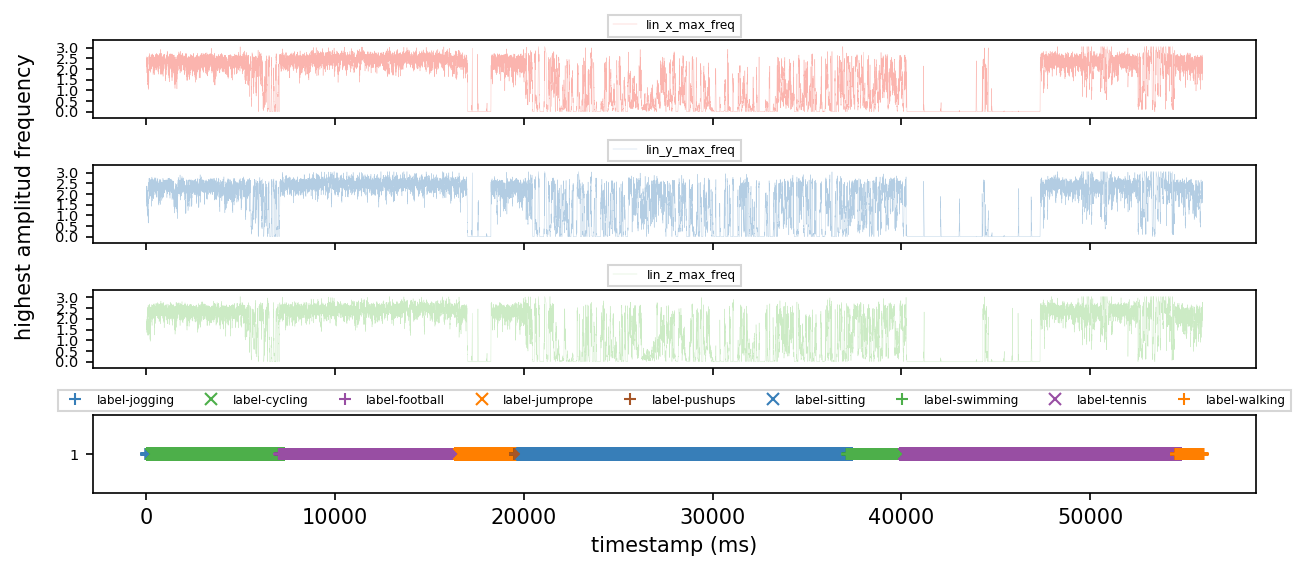

<Figure size 900x600 with 0 Axes>

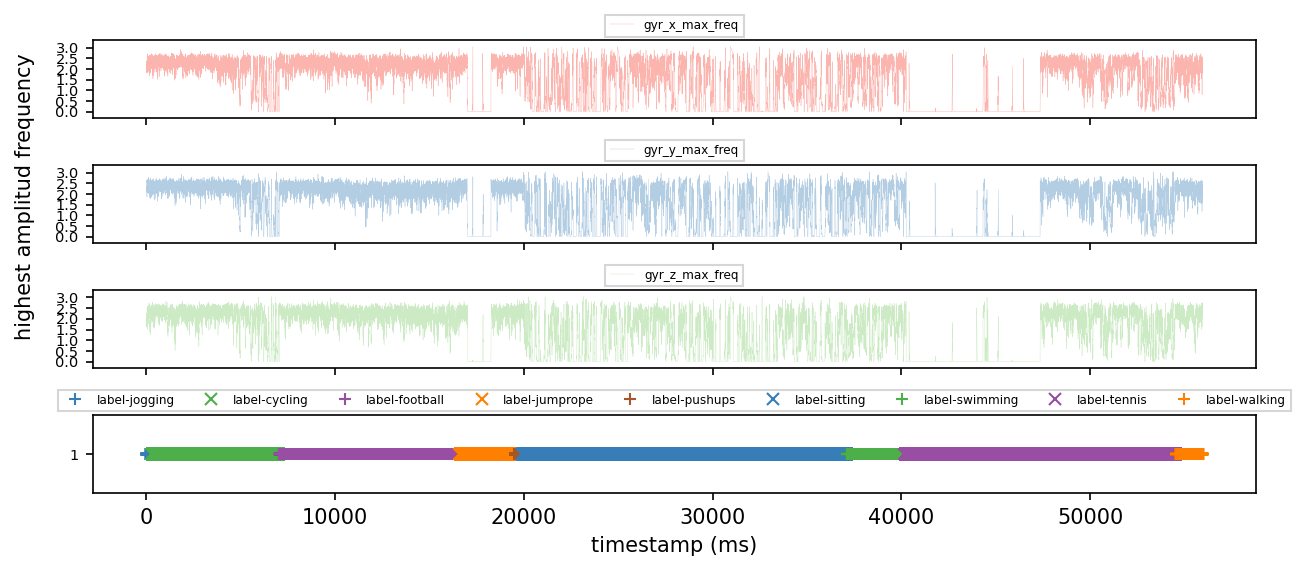

<Figure size 900x600 with 0 Axes>

In [49]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 150
# plot_frequencies(dataset, ['acc_x_max_freq', 'acc_y_max_freq', 'acc_z_max_freq'], ['like','like', 'like'], ['line','line', 'line'],title="")
plot_frequencies(dataset, ['acc_x_max_freq', 'acc_y_max_freq', 'acc_z_max_freq','label-'], ['like','like', 'like', 'like'], ['line','line', 'line', 'points'],title="")
plot_frequencies(dataset, ['grav_x_max_freq', 'grav_y_max_freq', 'grav_z_max_freq','label-'], ['like','like', 'like', 'like'], ['line','line', 'line', 'points'],title="")
plot_frequencies(dataset, ['lin_x_max_freq', 'lin_y_max_freq', 'lin_z_max_freq','label-'], ['like','like', 'like', 'like'], ['line','line', 'line', 'points'],title="")
plot_frequencies(dataset, ['gyr_x_max_freq', 'gyr_y_max_freq', 'gyr_z_max_freq','label-'], ['like','like', 'like', 'like'], ['line','line', 'line', 'points'],title="")


<Figure size 900x600 with 0 Axes>

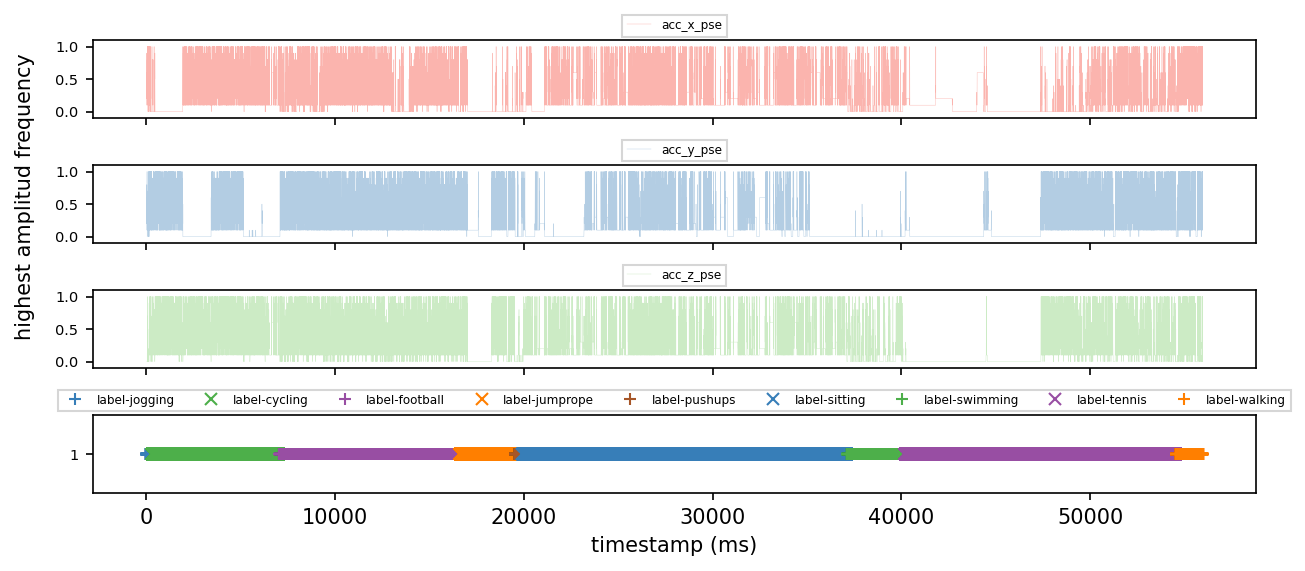

<Figure size 900x600 with 0 Axes>

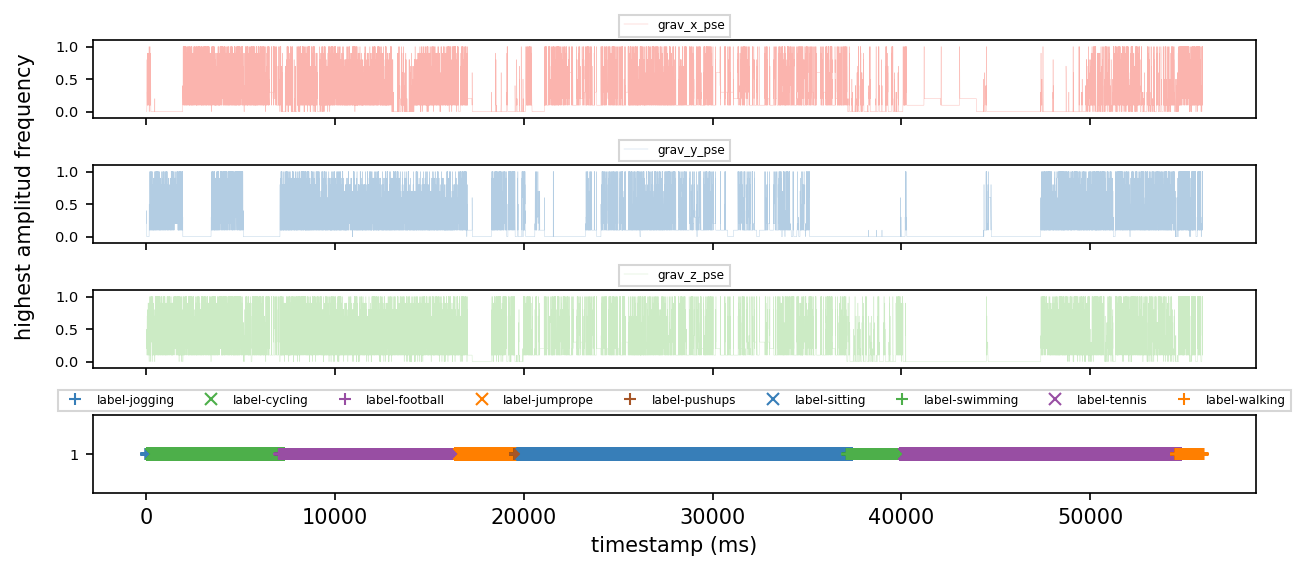

<Figure size 900x600 with 0 Axes>

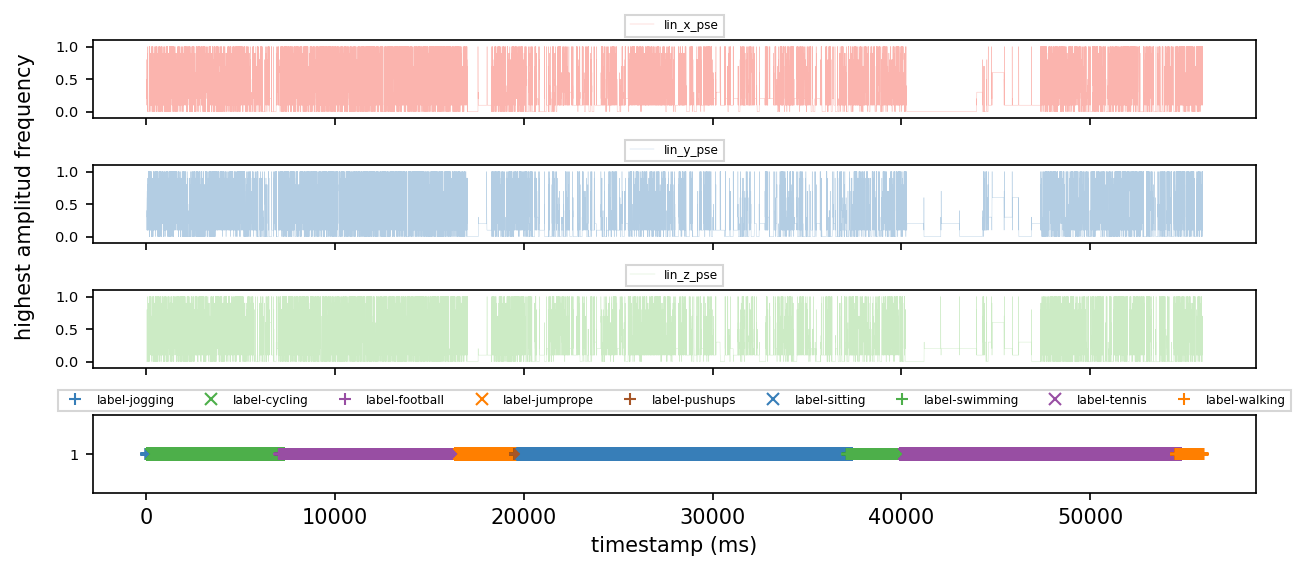

<Figure size 900x600 with 0 Axes>

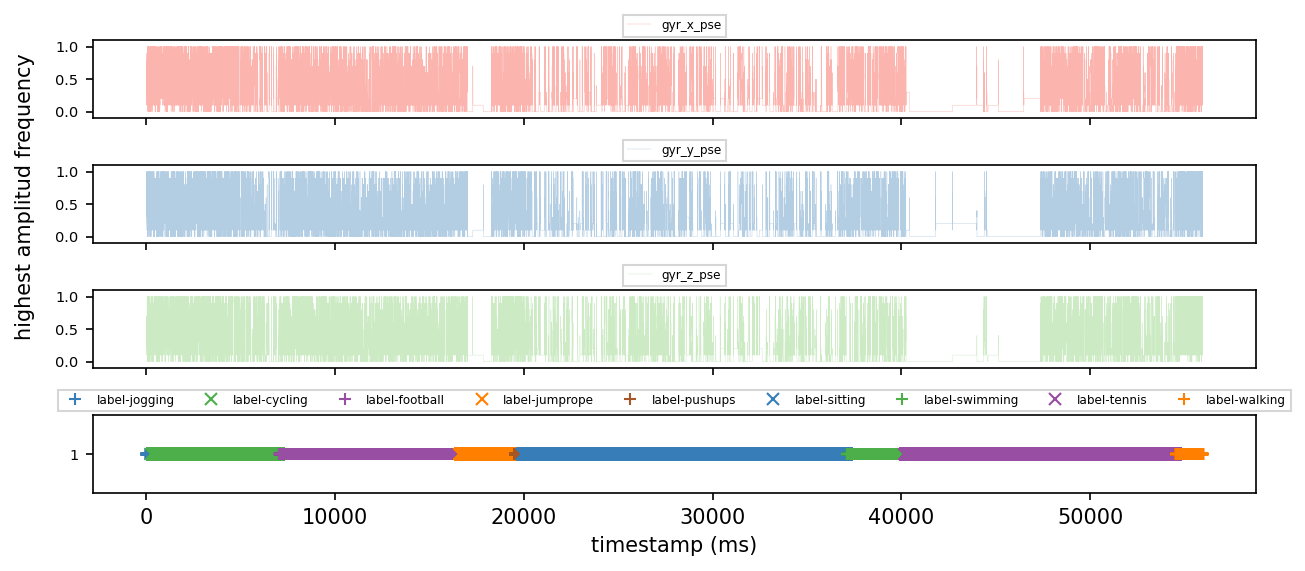

<Figure size 900x600 with 0 Axes>

In [40]:
plot_frequencies(dataset, ['acc_x_pse', 'acc_y_pse', 'acc_z_pse','label-'], ['like','like', 'like', 'like'], ['line','line', 'line', 'points'],title="")
plot_frequencies(dataset, ['grav_x_pse', 'grav_y_pse', 'grav_z_pse','label-'], ['like','like', 'like', 'like'], ['line','line', 'line', 'points'],title="")
plot_frequencies(dataset, ['lin_x_pse', 'lin_y_pse', 'lin_z_pse','label-'], ['like','like', 'like', 'like'], ['line','line', 'line', 'points'],title="")
plot_frequencies(dataset, ['gyr_x_pse', 'gyr_y_pse', 'gyr_z_pse','label-'], ['like','like', 'like', 'like'], ['line','line', 'line', 'points'],title="")

ValueError: min() arg is an empty sequence

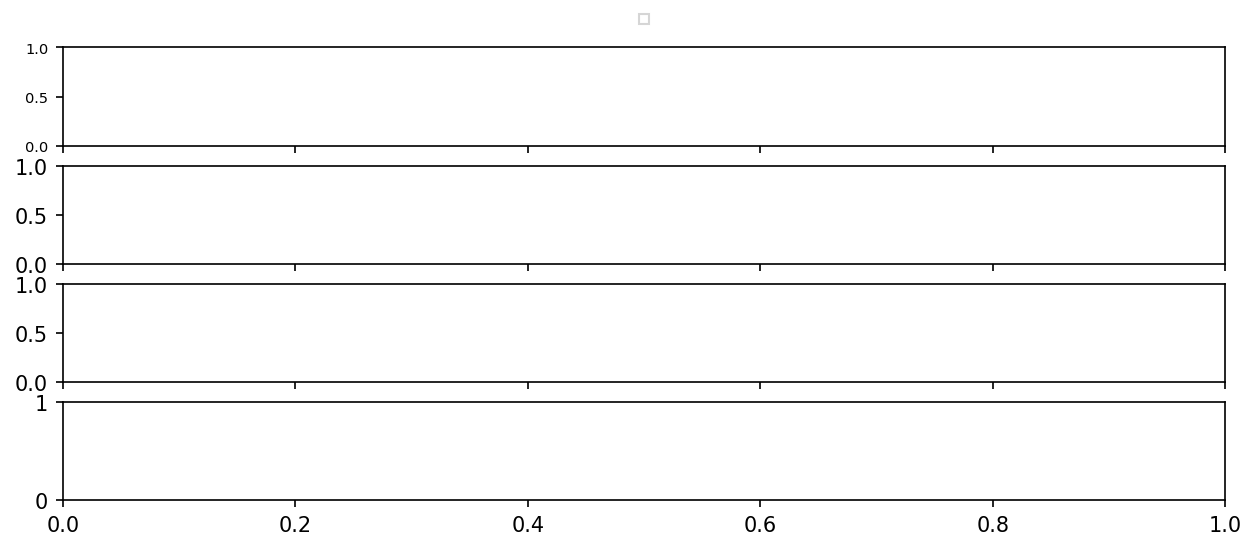

In [41]:
plot_frequencies(dataset, ['acc_x_weighted', 'acc_y_weighted', 'acc_z_weighted','label-'], ['like','like', 'like', 'like'], ['line','line', 'line', 'points'],title="")
plot_frequencies(dataset, ['grav_x_weighted', 'grav_y_weighted', 'grav_z_weighted','label-'], ['like','like', 'like', 'like'], ['line','line', 'line', 'points'],title="")
plot_frequencies(dataset, ['lin_x_weighted', 'lin_y_weighted', 'lin_z_weighted','label-'], ['like','like', 'like', 'like'], ['line','line', 'line', 'points'],title="")
plot_frequencies(dataset, ['gyr_x_weighted', 'gyr_y_weighted', 'gyr_z_weighted','label-'], ['like','like', 'like', 'like'], ['line','line', 'line', 'points'],title="")